# Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

# Defining Functions

In [ ]:
# To show frequency diagrams
def plot_hist(df_name, xvar_name):
    plt.hist(df_name[xvar_name].values)
    plt.xlabel(f"{xvar_name} categories")
    plt.ylabel("Count per each category")
    plt.show()

In [ ]:
def bar_plots(df_name,xvar_name):
    plt.bar(df_name[xvar_name].values, df_name)
    plt.xlabel(f"{xvar_name} categories")
    plt.ylabel("Count per each category")
    plt.show()

# Loading Dataset

In [2]:
df = pd.read_csv("../data/dataset_cleaned.csv")

In [14]:
df.shape

(11809, 24)

In [79]:
df['city'].describe()

count       11759
unique         24
top       Colombo
freq         1997
Name: city, dtype: object

In [80]:
df['placeName'].describe()

count                     11809
unique                      239
top       Nh Collection Colombo
freq                         50
Name: placeName, dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11809 entries, 0 to 11808
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   helpfulVotes             11809 non-null  float64
 1   id                       11809 non-null  float64
 2   address                  11809 non-null  object 
 3   city                     11759 non-null  object 
 4   placeName                11809 non-null  object 
 5   numberOfReviews          11809 non-null  int64  
 6   placeRating              11809 non-null  float64
 7   webUrl                   11809 non-null  object 
 8   publishedDate            11809 non-null  object 
 9   userRating               11809 non-null  float64
 10  roomTip                  1989 non-null   object 
 11  review_text              11809 non-null  object 
 12  review_title             11809 non-null  object 
 13  travelDate               11800 non-null  object 
 14  tripType              

helpfulvotes
    - placerating
    - trip type
    - review_text_length
place rating
    - #reviews
    - userRating
    - published date
    - tripDate
    - tripDate
user rating
    - review text lenght
no_of_rating for hotel vs
    - tot helpful votes
    - avg rating
    - 
review text length vs review_title length

In [4]:
df.sample(5)

,helpfulVotes,id,address,city,placeName,numberOfReviews,placeRating,webUrl,publishedDate,userRating,...,tripType,username,word_tokenization,bpe_tokenization,bigram_tokenization,trigram_tokenization,whitespace_tokenization,rule_tokenization,spacy_tokenization,wordpiece_tokenization
9231,0.0,880064980.0,"Amunugama Walawwa, Kundasale 20270 Sri Lanka",Kundasale,The Kandy House,860,4.5,https://www.tripadvisor.com/Hotel_Review-g1199...,2023-02-25,5.0,...,COUPLES,LouiseM976,"['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['▁fabulous', '▁oasis', '▁calm', '▁close', '▁k...","[('fabulous', 'oasis'), ('oasis', 'calm'), ('c...","[('fabulous', 'oasis', 'calm'), ('oasis', 'cal...","['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['fabulous', 'oasis', 'calm', 'close', 'kandy'...","['fabulous', 'oasis', 'calm', 'close', 'kan', ..."
9985,0.0,978194110.0,"No 01 Glen Fall Road, Nuwara Eliya 22200 Sri L...",Nuwara Eliya,Araliya Green City,1517,5.0,https://www.tripadvisor.com/Hotel_Review-g6085...,2024-10-31,5.0,...,FAMILY,xitiv2024,"['make', 'stay', 'comfortable', 'make', 'feel'...","['▁make', '▁stay', '▁comfortable', '▁make', '▁...","[('make', 'stay'), ('stay', 'comfortable'), ('...","[('make', 'stay', 'comfortable'), ('stay', 'co...","['make', 'stay', 'comfortable', 'make', 'feel'...","['make', 'stay', 'comfortable', 'make', 'feel'...","['make', 'stay', 'comfortable', 'make', 'feel'...","['make', 'stay', 'comfortable', 'make', 'feel'..."
1293,1.0,953023985.0,"102A, Kirulapone Avenue Baseline Road, Colombo...",Colombo,Best Western Elyon Colombo,784,4.0,https://www.tripadvisor.com/Hotel_Review-g2939...,2024-05-30,5.0,...,SOLO,Ryan777392312,"['wonderful', 'stay', 'delicious', 'food', 'ex...","['▁wonderful', '▁stay', '▁delicious', '▁food',...","[('wonderful', 'stay'), ('stay', 'delicious'),...","[('wonderful', 'stay', 'delicious'), ('stay', ...","['wonderful', 'stay', 'delicious', 'food', 'ex...","['wonderful', 'stay', 'delicious', 'food', 'ex...","['wonderful', 'stay', 'delicious', 'food', 'ex...","['wonderful', 'stay', 'delicious', 'food', 'ex..."
8425,0.0,965103135.0,"#12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",Kandy,Grand Serendib Hotel,191,4.5,https://www.tripadvisor.com/Hotel_Review-g3041...,2024-08-16,5.0,...,FAMILY,B636MIjamesm,"['view', 'absolute', 'best', 'thing', 'hotel',...","['▁view', '▁absolute', '▁best', '▁thing', '▁ho...","[('view', 'absolute'), ('absolute', 'best'), (...","[('view', 'absolute', 'best'), ('absolute', 'b...","['view', 'absolute', 'best', 'thing', 'hotel',...","['view', 'absolute', 'best', 'thing', 'hotel',...","['view', 'absolute', 'best', 'thing', 'hotel',...","['view', 'absolute', 'best', 'thing', 'hotel',..."
10598,0.0,967275686.0,"Mahagastota Hill Climb Blackpool, Nuwara Eliya...",Nuwara Eliya,The Blackpool Resort & Spa,1150,4.5,https://www.tripadvisor.com/Hotel_Review-g6085...,2024-08-28,5.0,...,FAMILY,kumarjain748,"['good', 'reasort', 'stay', 'good', 'food', 'e...","['▁good', '▁re', 'as', 'ort', '▁stay', '▁good'...","[('good', 'reasort'), ('reasort', 'stay'), ('s...","[('good', 'reasort', 'stay'), ('reasort', 'sta...","['good', 'reasort', 'stay', 'good', 'food', 'e...","['good', 'reasort', 'stay', 'good', 'food', 'e...","['good', 'reasort', 'stay', 'good', 'food', 'e...","['good', 're', '##as', '##ort', 'stay', 'good'..."


# Frequency Distribution - Single Level

#### Number of reviews per each city

In [76]:
df.groupby("city")['city'].count().sort_values()

city
Ahangama          50
Ampitiya          50
Hantana           50
Gurudeniya        50
Kosgoda           50
Wattegama         50
Rathgama          50
Miwaladeniya      50
Werapitiya        50
Heerassagala      99
Ahungalla        100
Kundasale        100
Koggala          100
Bentota          348
Hikkaduwa        400
Pottuvil         438
Unawatuna        449
Arugam Bay       492
Galle            550
Trincomalee      913
Kandy           1448
Nuwara Eliya    1927
Ella            1948
Colombo         1997
Name: city, dtype: int64

#### Number of Reviews per each Hotel

In [17]:
# Number of reviews per each hotel
df.groupby("placeName")['placeName'].count().sort_values()

placeName
Wild Resort Ella                   34
Dutch Bay Beach Cottages           35
Ella Paddy Field View Guest Inn    38
Trinco Blue Waves                  40
Trincomalee Beach Resort & Spa     40
                                   ..
Trinco Blu By Cinnamon             50
Welcombe Hotel - Trinco            50
Whisky Point Resort                50
Yara Galle Fort                    50
Zion View Ella Green Retreat       50
Name: placeName, Length: 239, dtype: int64

#### Number of Reviews per Each Trip Type

In [18]:
df.groupby("tripType")['tripType'].count().sort_values()

tripType
BUSINESS     372
SOLO         918
NONE        1042
FRIENDS     1821
FAMILY      3470
COUPLES     4177
Name: tripType, dtype: int64

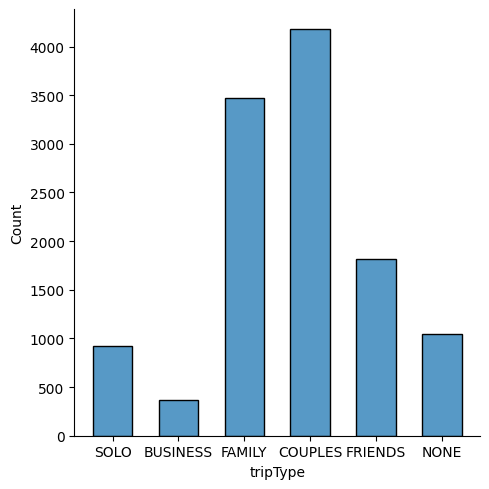

In [ ]:
sns.displot(df, x="tripType", shrink=0.6)

In [32]:
type(df["city"].values)

numpy.ndarray

#### Number of Reviews per Each PlaceRating

In [71]:
place_rating_count = df.groupby(["placeName","placeRating"])['placeRating'].count().sort_values().to_frame()
place_rating_count

,,placeRating
placeName,placeRating,
Wild Resort Ella,4.5,34
Dutch Bay Beach Cottages,4.0,35
Ella Paddy Field View Guest Inn,4.0,38
Trinco Blue Waves,4.5,40
Trincomalee Beach Resort & Spa,2.5,40
...,...,...
Trinco Blu By Cinnamon,4.5,50
Welcombe Hotel - Trinco,3.5,50
Whisky Point Resort,5.0,50


In [73]:
place_rating_count.rename(columns={"placeRating": "rating_count"}, inplace=True)
place_rating_count

,,rating_count
placeName,placeRating,
Wild Resort Ella,4.5,34
Dutch Bay Beach Cottages,4.0,35
Ella Paddy Field View Guest Inn,4.0,38
Trinco Blue Waves,4.5,40
Trincomalee Beach Resort & Spa,2.5,40
...,...,...
Trinco Blu By Cinnamon,4.5,50
Welcombe Hotel - Trinco,3.5,50
Whisky Point Resort,5.0,50


In [74]:
place_rating_count2 = place_rating_count.reset_index()
place_rating_count2

,placeName,placeRating,rating_count
0,Wild Resort Ella,4.5,34
1,Dutch Bay Beach Cottages,4.0,35
2,Ella Paddy Field View Guest Inn,4.0,38
3,Trinco Blue Waves,4.5,40
4,Trincomalee Beach Resort & Spa,2.5,40
...,...,...,...
234,Trinco Blu By Cinnamon,4.5,50
235,Welcombe Hotel - Trinco,3.5,50
236,Whisky Point Resort,5.0,50
237,Yara Galle Fort,5.0,50


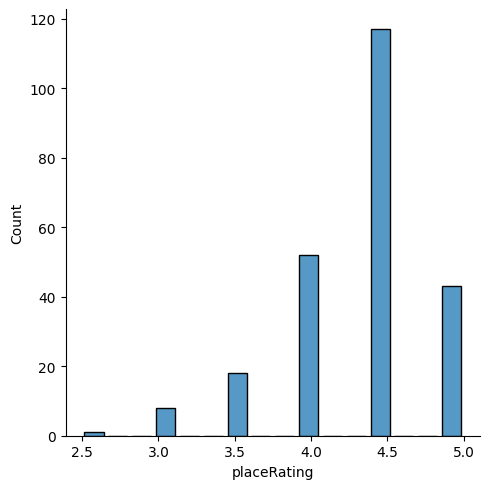

In [75]:
sns.displot(place_rating_count2, x="placeRating", shrink =.8)

#### Number of Reviews per Each User Rating

In [50]:
df.groupby("userRating")['userRating'].count().sort_values()

userRating
2.0     353
1.0     560
3.0     695
4.0    1786
5.0    8415
Name: userRating, dtype: int64

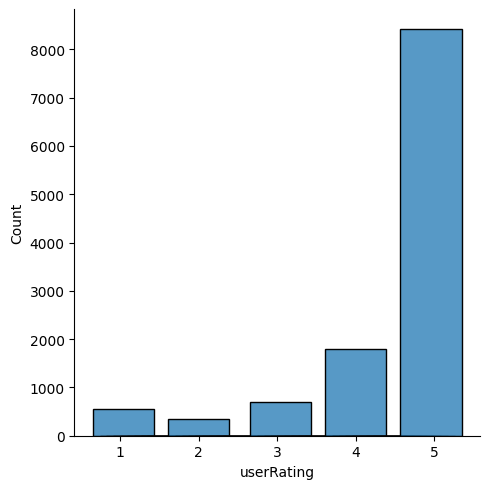

In [51]:
sns.displot(df, x="userRating", shrink =9)

In [ ]:
placeRating

y - place rating
horizontally divided for each rating in y
histogram of user rating for each place

# Frequency Distribution - Mulit Level